In [4]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
import os

# Data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
)

val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 128

# Training data generator for 64x64 grayscale images
train_generator = train_datagen.flow_from_directory(
    'data2/train',  # Update the directory if necessary
    target_size=(64, 64),  # Adjusted for 64x64 images
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

# Validation data generator for 64x64 grayscale images
validation_generator = val_datagen.flow_from_directory(
    'data2/test',  # Update the directory if necessary
    target_size=(64, 64),  # Adjusted for 64x64 images
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

class_names = list(train_generator.class_indices.keys())
print(class_names)

# Model definition
model = Sequential()
# Convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(64, 64, 1)))  # Adjusted for 64x64 input
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer for 6 classes
model.add(Dense(6, activation='softmax'))

print(model.summary())

Found 12000 images belonging to 6 classes.
Found 6000 images belonging to 6 classes.
['A', 'B', 'C', 'del', 'nothing', 'space']
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                        

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 256)       0

In [5]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [6]:
!rm -rf Logs
logdir = os.path.join("Logs")
tensorboard_callback = TensorBoard(log_dir=logdir)

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[tensorboard_callback]
)

Epoch 1/15
93/93 [==============================] - 297s 3s/step - loss: 1.7931 - accuracy: 0.1682 - val_loss: 1.7918 - val_accuracy: 0.1668
Epoch 2/15
93/93 [==============================] - 249s 3s/step - loss: 1.7907 - accuracy: 0.1732 - val_loss: 1.7923 - val_accuracy: 0.1666
Epoch 3/15
93/93 [==============================] - 242s 3s/step - loss: 1.7811 - accuracy: 0.1803 - val_loss: 1.5700 - val_accuracy: 0.3224
Epoch 4/15
93/93 [==============================] - 247s 3s/step - loss: 1.3516 - accuracy: 0.3950 - val_loss: 0.7680 - val_accuracy: 0.6338
Epoch 5/15
93/93 [==============================] - 244s 3s/step - loss: 0.6288 - accuracy: 0.6883 - val_loss: 0.4035 - val_accuracy: 0.7476
Epoch 6/15
93/93 [==============================] - 234s 3s/step - loss: 0.4035 - accuracy: 0.7899 - val_loss: 0.2252 - val_accuracy: 0.9085
Epoch 7/15
93/93 [==============================] - 236s 3s/step - loss: 0.1951 - accuracy: 0.9278 - val_loss: 0.0520 - val_accuracy: 0.9849
Epoch 8/15
93

In [10]:
%load_ext tensorboard
%tensorboard --logdir Logs

Reusing TensorBoard on port 6006 (pid 25664), started 1 day, 1:39:01 ago. (Use '!kill 25664' to kill it.)

In [1]:
model_json = model.to_json()
with open("signlanguagemodel.json",'w') as json_file:
    json_file.write(model_json)
model.save("signlanguagemodel.h5")

NameError: name 'model' is not defined

# Confusion matrix Visualization 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.preprocessing.image import ImageDataGenerator

In [14]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


# Confusion Matrix

In [21]:
# Generate predictions
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
y_true = validation_generator.classes

# Get class names
class_names = list(validation_generator.class_indices.keys())

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

47/47 [==============================] - 20s 415ms/step


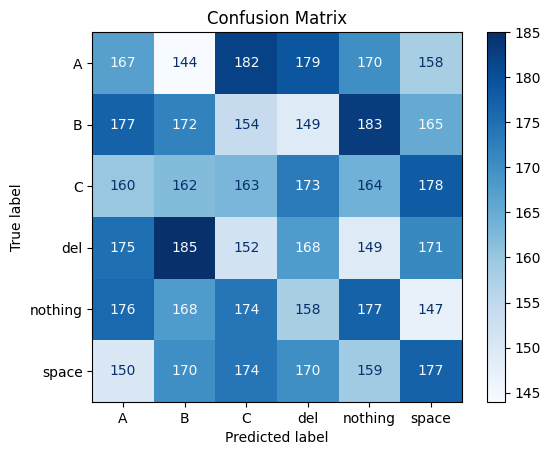

In [22]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

47/47 [==============================] - 19s 410ms/step


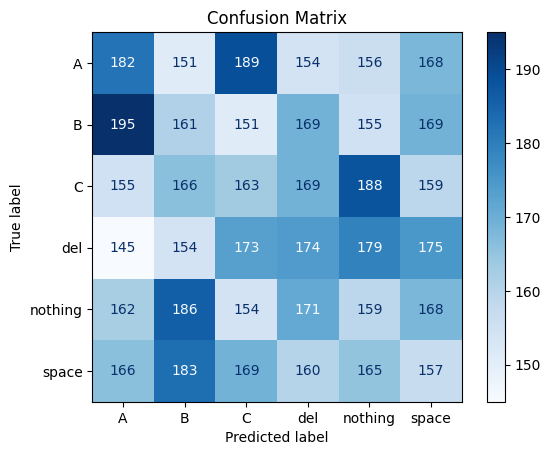

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.preprocessing.image import ImageDataGenerator

# Evaluate model on validation data
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
y_true = validation_generator.classes

# Get class names
class_names = list(validation_generator.class_indices.keys())

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Precision & Recall

In [27]:
from sklearn.metrics import precision_score, recall_score, classification_report
import numpy as np

# Generate predictions on validation data
validation_generator.reset()  # Reset the validation generator

# Calculate steps for full validation set
steps = np.ceil(validation_generator.samples / batch_size).astype(int)

# Predict the classes for validation data
y_pred = model.predict(validation_generator, steps=steps, verbose=1)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true = validation_generator.classes[:len(y_pred_classes)]  # Slice true labels to match predicted labels

# Calculate precision and recall
precision = precision_score(y_true, y_pred_classes, average='macro')  # 'macro' to average precision over all classes
recall = recall_score(y_true, y_pred_classes, average='macro')        # 'macro' to average recall over all classes

# Print precision and recall
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Optional: Detailed classification report for each class
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)


47/47 [==============================] - 54s 1s/step
Precision: 0.16251954146713152
Recall: 0.1625
              precision    recall  f1-score   support

           A       0.16      0.16      0.16      1000
           B       0.14      0.14      0.14      1000
           C       0.17      0.17      0.17      1000
         del       0.16      0.16      0.16      1000
     nothing       0.16      0.16      0.16      1000
       space       0.18      0.18      0.18      1000

    accuracy                           0.16      6000
   macro avg       0.16      0.16      0.16      6000
weighted avg       0.16      0.16      0.16      6000



In [20]:
pip install scikit-learn seaborn

Note: you may need to restart the kernel to use updated packages.


ValueError: No model config found in the file at <tensorflow.python.platform.gfile.GFile object at 0x0000020BDE3B5888>.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def find_closest_face(embedding, known_encodings, known_labels):
    # Calculate cosine similarities between the test embedding and all known embeddings
    similarities = cosine_similarity([embedding], known_encodings)[0]
    
    # Get the label of the closest match
    closest_idx = np.argmax(similarities)
    return known_labels[closest_idx]

# Predictions using cosine similarity
y_pred = []
for encoding in encodings:
    predicted_label = find_closest_face(encoding, encodings, labels)
    y_pred.append(predicted_label)

# Convert labels to numeric format if needed
unique_labels = list(set(labels))
y_true = [unique_labels.index(label) for label in labels]
y_pred = [unique_labels.index(label) for label in y_pred]